In [1]:
import tensorflow


In [2]:
 from tensorflow.keras.datasets import reuters
 (train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)
 

8982

In [4]:
 len(test_data)

2246

In [5]:
 # As with the IMDB reviews, each example is a list of integers (word indices):

In [6]:
 train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [ ]:
#  word_index = reuters.get_word_index()
#  reverse_word_index = dict(
#     [(value, key) for (key, value) in word_index.items()])
#  decoded_newswire = " ".join(
#     [reverse_word_index.get(i - 3, "?") for i in
#      train_data[0]]) 

In [7]:
 train_labels[10]

3

In [9]:
import numpy as np 
def vectorize_sequences(sequences, dimension=10000): ## manual one hot encoding
    results = np.zeros((len(sequences), dimension)) #we created a metrix of zeros
    #sequence --- a complete review
    print (sequences)
    for i, sequence in enumerate(sequences): #i enumerate
        results[i, sequence] = 1           
    return results


In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

[list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])
 list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])
 list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 139

In [11]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [12]:
train_labels.shape

(8982,)

In [13]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))


    for i, label in enumerate(labels):
        results[i, label] = 1. 
    return results
y_train = to_one_hot(train_labels)   
y_test = to_one_hot(test_labels)
# or
# from tensorflow.keras.utils import to_categorical
#  y_train = to_categorical(train_labels)
#  y_test = to_categorical(test_labels)

In [24]:

from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
 ])

In [25]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy",metrics=["accuracy"])


In [26]:
#Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [27]:
 #Training the model
 history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 30ms/step - loss: 2.7033 - accuracy: 0.4768 - val_loss: 1.8455 - val_accuracy: 0.6100
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.5430 - accuracy: 0.6711 - val_loss: 1.3962 - val_accuracy: 0.6840
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.1793 - accuracy: 0.7412 - val_loss: 1.1881 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 0s 21ms/step - loss: 0.9659 - accuracy: 0.7884 - val_loss: 1.0720 - val_accuracy: 0.7650
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.8079 - accuracy: 0.8188 - val_loss: 1.0209 - val_accuracy: 0.7670
Epoch 6/20
16/16 [==============================] - 0s 20ms/step - loss: 0.6734 - accuracy: 0.8529 - val_loss: 0.9660 - val_accuracy: 0.7850
Epoch 7/20
16/16 [==============================] - 0s 20ms/step - loss: 0.5684 - accuracy: 0.8763 - val_loss: 0.9182 - val_accuracy: 0.8090
Epoch 8/20
16

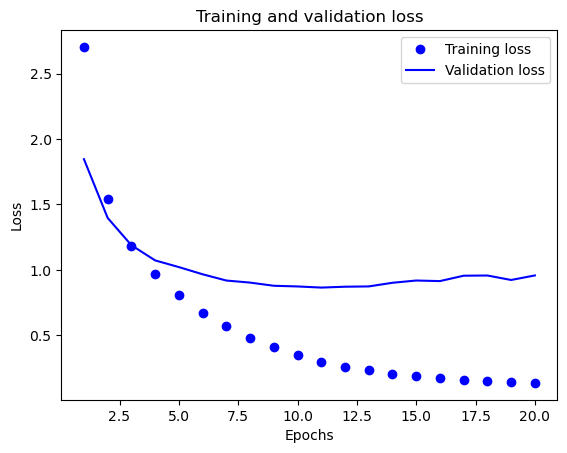

In [28]:
 import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

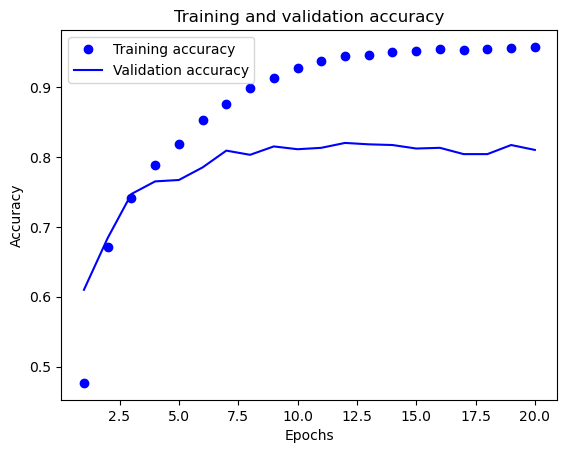

In [29]:
#Plotting the training and validation accuracy
# Clears the figure
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [30]:
# Retraining a model from scratch
model = keras.Sequential([
layers.Dense(64, activation='relu'),
layers.Dense(64, activation="relu"),
layers.Dense(46, activation="softmax") ])
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])



In [31]:
model.fit(x_train,y_train,epochs=9,batch_size=512)

Epoch 1/9
18/18 [==============================] - 1s 15ms/step - loss: 2.6194 - accuracy: 0.4914
Epoch 2/9
18/18 [==============================] - 0s 16ms/step - loss: 1.4806 - accuracy: 0.6807
Epoch 3/9
18/18 [==============================] - 0s 17ms/step - loss: 1.1402 - accuracy: 0.7505
Epoch 4/9
18/18 [==============================] - 0s 16ms/step - loss: 0.9368 - accuracy: 0.7989
Epoch 5/9
18/18 [==============================] - 0s 16ms/step - loss: 0.7828 - accuracy: 0.8302
Epoch 6/9
18/18 [==============================] - 0s 17ms/step - loss: 0.6502 - accuracy: 0.8588
Epoch 7/9
18/18 [==============================] - 0s 15ms/step - loss: 0.5386 - accuracy: 0.8873
Epoch 8/9
18/18 [==============================] - 0s 16ms/step - loss: 0.4541 - accuracy: 0.9051
Epoch 9/9
18/18 [==============================] - 0s 16ms/step - loss: 0.3886 - accuracy: 0.9187


In [32]:
import pandas as pd
pd.DataFrame(history.history)


,loss,accuracy,val_loss,val_accuracy
0,2.703310,0.476823,1.845534,0.610
1,1.543030,0.671135,1.396241,0.684
2,1.179287,0.741168,1.188065,0.747
3,0.965884,0.788399,1.071994,0.765
4,0.807912,0.818842,1.020917,0.767
5,0.673368,0.852919,0.966002,0.785
6,0.568375,0.876347,0.918201,0.809
7,0.477039,0.898271,0.902429,0.803
8,0.408563,0.912553,0.878223,0.815
9,0.346840,0.926961,0.873004,0.811


In [33]:
x_train.shape

(8982, 10000)

In [34]:
 model.predict(x_test[249].reshape(1,10000))

1/1 [==============================] - 0s 68ms/step


array([[1.1863710e-06, 3.3005217e-05, 1.4886401e-06, 9.9896085e-01,
        4.6783729e-04, 2.1022220e-06, 2.2262295e-05, 4.5480847e-06,
        4.5030254e-05, 4.1919866e-06, 1.9212284e-05, 1.8819404e-05,
        5.5926453e-06, 5.0721396e-06, 2.8261659e-06, 4.7698491e-06,
        8.2312661e-05, 2.3167354e-06, 2.5404524e-06, 8.9744259e-05,
        5.1100276e-05, 8.6878157e-07, 3.4603289e-07, 3.3528617e-05,
        6.2149627e-07, 7.5655885e-07, 9.0798318e-07, 1.5470554e-06,
        3.8004366e-06, 1.9094394e-05, 6.6757912e-06, 6.4690412e-06,
        2.1942289e-05, 3.4221762e-06, 1.1008151e-06, 2.6928169e-06,
        3.9100658e-05, 1.0124534e-06, 2.9259229e-06, 5.1994184e-06,
        3.2184002e-07, 1.1888509e-05, 4.7307039e-06, 2.6837645e-06,
        6.1131726e-07, 7.9054217e-07]], dtype=float32)

In [35]:
y_test[249]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [36]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 0.9378 - accuracy: 0.7845
